In [11]:
import numpy as np
import dynesty
import tqdm
from dynesty import utils as dyfunc
from dynesty import plotting as dyplot

In the dynesty example they define a likelihood being a 3D correlated multivariable Normal and the prior is uniform in each direction  from [-10,10)

In [21]:
# Define the dimensionality of our problem.
ndim = 3

# Define our 3-D correlated multivariate normal likelihood.
C = np.identity(ndim)  # set covariance to identity matrix

#QUE PASA SI NO LE PONGO CORRELACIÓN, COMO SE SI TIENE CORRELACIÓN? O CUAL PONERLE XK MIS R VAN A TENER CORRELACION
#AL SER FUNCION DEL TIEMPO NO?
C[C==0] = 0.95  # set off-diagonal terms
Cinv = np.linalg.inv(C)  # define the inverse (i.e. the precision matrix)

#HERE I SHOULD NORMALICE BUT I STILL DONT KNOW WHAT IS THAT USEFULL FOR
#lnorm = -0.5 * (np.log(2 * np.pi) * ndim +
#                np.log(np.linalg.det(C)))

def loglike(x):
    """The log-likelihood function."""

    return -0.5 * np.dot(x, np.dot(Cinv, x)) #+ lnorm

#Define our uniform prior. 
#SUPONGO QUE ESTA TENDRE QUE MANDARLA A UNA UNIFORME DENTRO DE UN RANGO CERCA DE LOS RESULT DEL LEAST_SQ
def ptform(u):
    """Transforms samples `u` drawn from the unit cube to samples to those
    from our uniform prior within [-10., 10.) for each variable."""

    return 10.*(2.*u - 1.)

In [22]:
# "Dynamic" nested sampling.
dsampler = dynesty.DynamicNestedSampler(loglike, ptform, ndim)
dsampler.run_nested()
dresults = dsampler.results

iter: 13975 | batch: 7 | bound: 4 | nc: 1 | ncall: 36909 | eff(%): 37.755 | loglstar: -5.585 < -0.029 < -0.815 | logz: -6.428 +/-  0.063 | stop:  0.935                                               

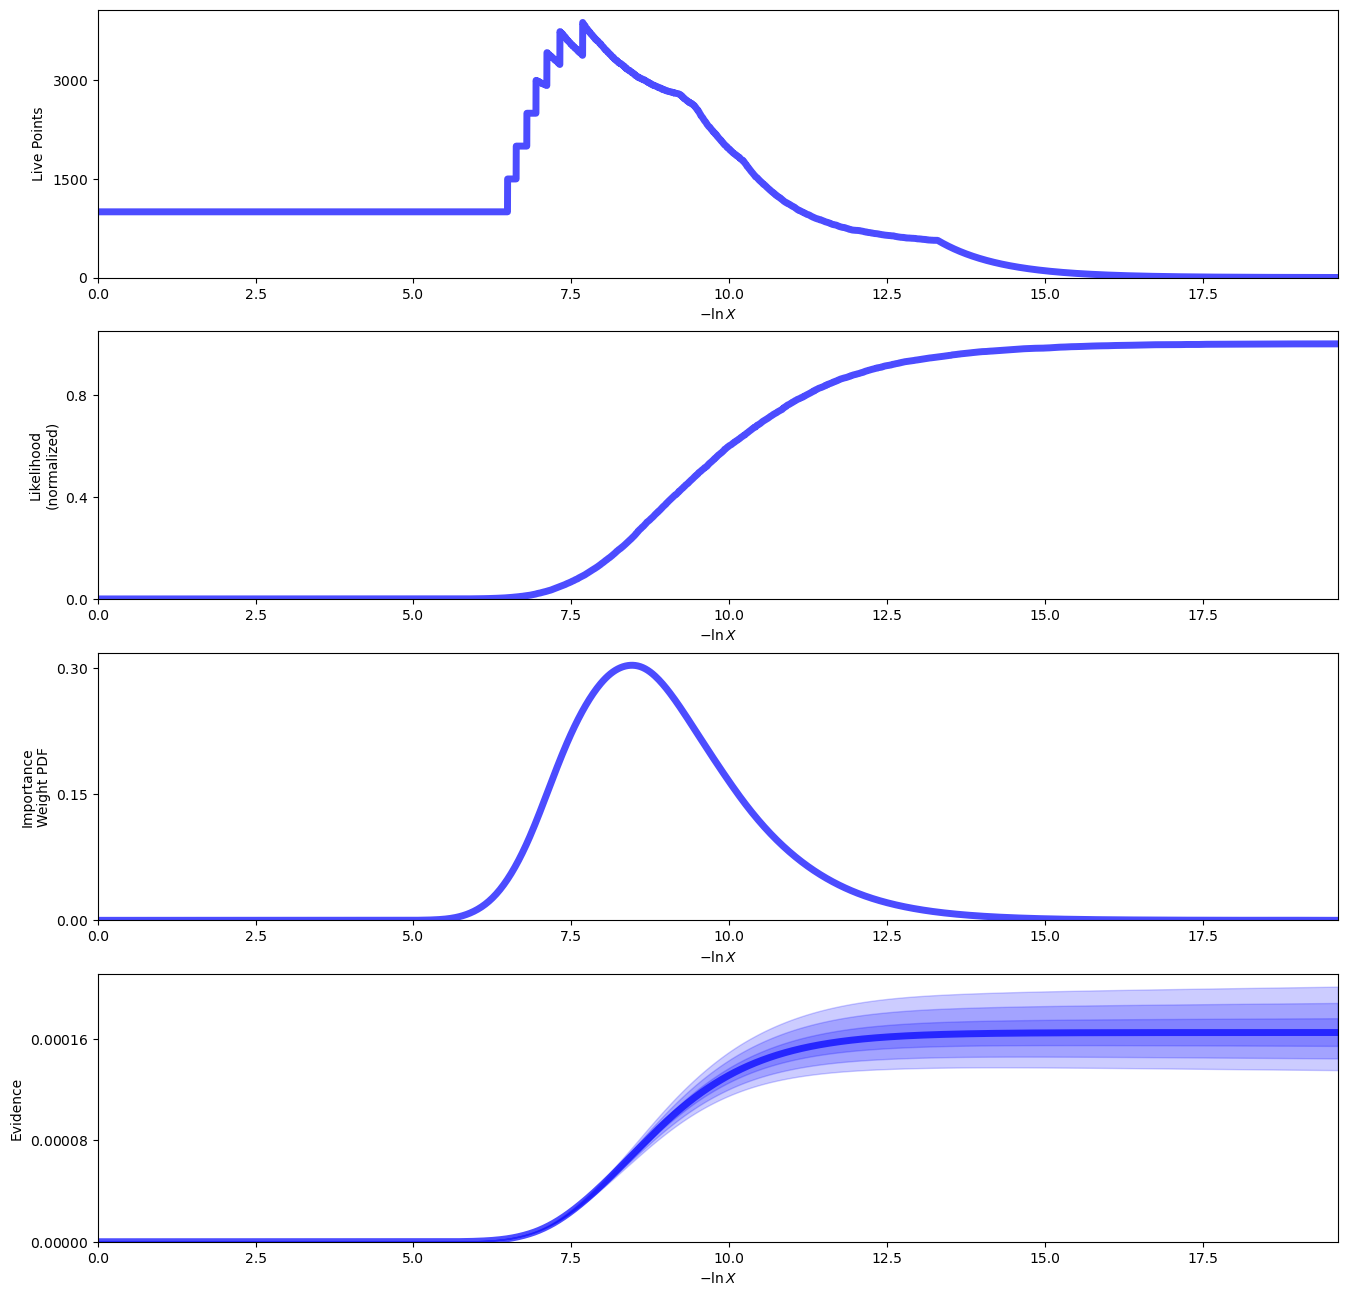

In [23]:
# Plot a summary of the run.
rfig, raxes = dyplot.runplot(results)

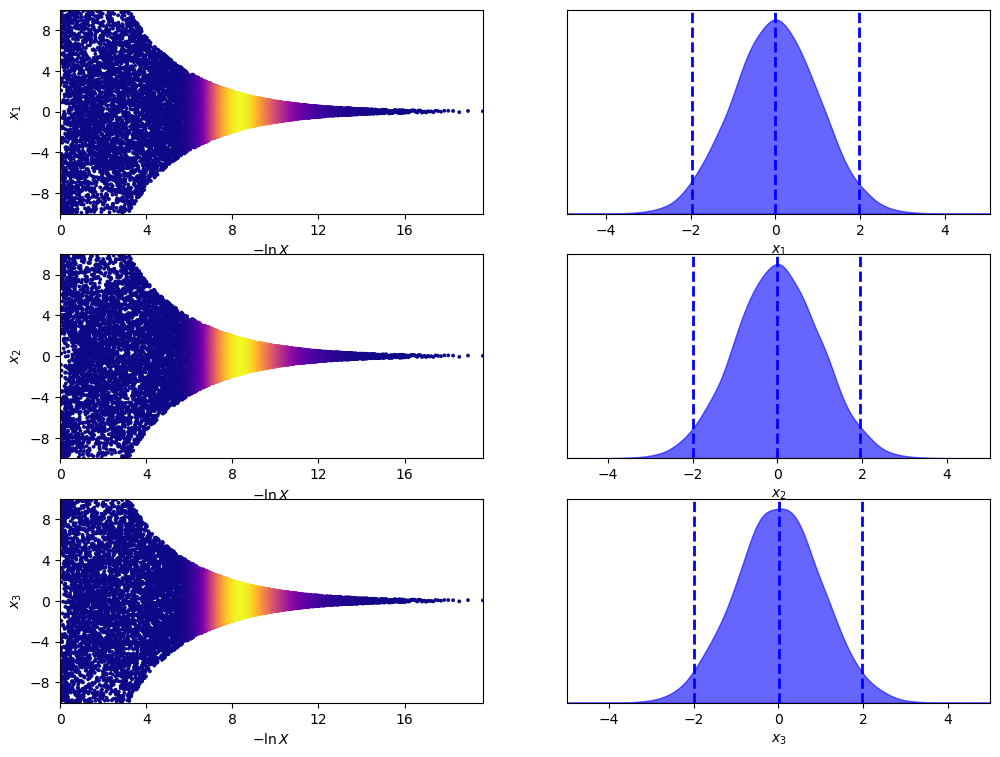

In [24]:
# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(results)

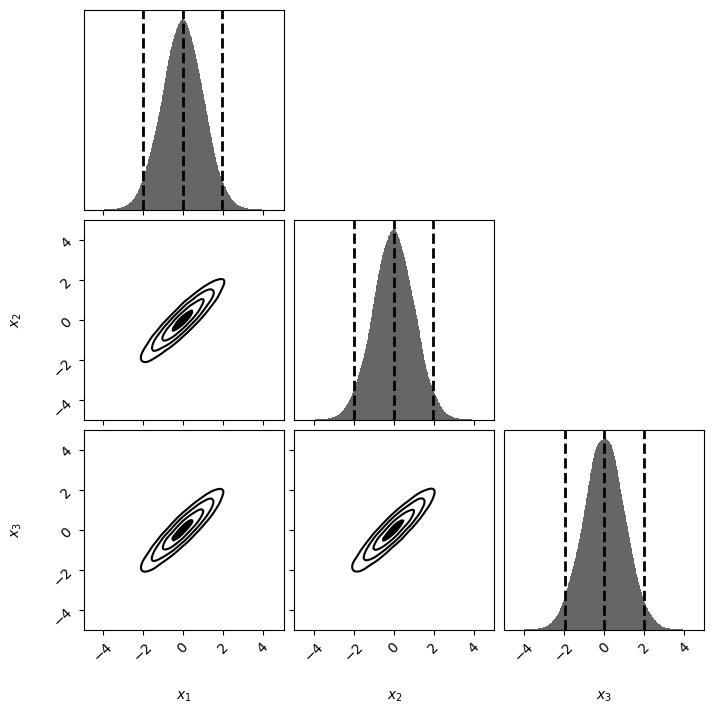

In [25]:
# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(results)